In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#number of columns
p = 50
#number of rows
n = 100

np.random.seed(12)
x1 = np.random.normal(size=p)
ones = np.ones(p)
X = np.concatenate([ones, x1])

#add noise
epsilon = np.random.normal(size=p)
Y = epsilon

#generate dataset
for i in range(n - 2):
    xx = np.random.normal(size=p)
    #all the coefficients are equal to 1
    Y += xx
    X = np.concatenate([X, xx])

X = X.reshape(-1, n)
Y = Y.reshape(-1, 1)

weights = np.random.randn(n, 1)
print(weights.shape)

(100, 1)


The mean squared error is used as the cost function.
$$
cost(w) = \frac{1}{2 * n} \sum_i (y_i - \hat{y_i})^2
$$

with the fist order derivative:
$$
dw = \frac{-2}{n} \sum_i x_i(\hat{y_i} - y_i)
$$

In [3]:
def cost(X, weights, Y):
    residual = Y - (X @ weights)
    return np.sum(residual ** 2) / (2 * len(X))

#the cost without optimization
cost(X, weights, Y)

79.54665432963898

In order to minimize the cost, we used the gradient descent algorithm. The new weight is given by:
$$
w_{new} = w - \eta\frac{\partial L1}{\partial w}
$$

In [4]:
def gradient(X, weights, Y):
    residual = Y - (X @ weights)
    return -2/len(X) * X.T @ residual

In [5]:
#gradient descent
def gradientDescent(X, weights, Y, iterations=1000, alpha=0.01):
    """   
        iterations: the number of iterations
        alpha: the learning rate
    """
    costs = np.zeros(iterations)
    for i in range(iterations):
        g = gradient(X, weights, Y)
        weights = weights - alpha * g
        costs[i] = cost(X, weights, Y)
    return weights, costs

weights_gd, costs_gd = gradientDescent(X, weights.copy(), Y)

print("max", np.max(weights_gd))
print("std", np.std(weights_gd))
print("mean", np.mean(weights_gd))

max 3.6253266637875217
std 1.2606185572317896
mean 0.09753334508338478


The cost of a ridge regression is given by:
$$
cost(w) = \frac{1}{2 * n} \sum_i (y_i - \hat{y_i})^2 + \lambda \sum_j (w_j)^2
$$

The derivative of the ridge function gives:
$$
\frac{-2}{n} \sum_i x_i(\hat{y_i} - y_i) + 2\lambda w_i
$$

The weight is updated by substracting learning rate times the gradient:
$$
w_{new} = w - \alpha * gradient
$$

In [6]:
#ridge
def l2(X, weights, Y, iterations=1000, alpha=0.01, l=0.1):
    """   
        iterations: the number of iterations
        alpha: the learning rate
        l: the regularization parameter (lambda) 
    """
    costs = np.zeros(iterations)
    for i in range(iterations):
        g = gradient(X, weights, Y) + 2 * weights * l
        weights = weights - alpha * g
        squared = (Y - (X @ weights))**2
        costs[i] = cost(X, weights, Y) + l * np.sum(weights**2)
    return weights, costs

weights_l2, costs_l2 = l2(X, weights.copy(), Y)

print("max", np.max(weights_l2))
print("std", np.std(weights_l2))
print("mean", np.mean(weights_l2))

max 2.742938303994115
std 0.931350098870264
mean 0.11960151385261863


The cost of a lasso regression is given by:
$$
cost(w) = \frac{1}{2 * n} \sum_i (y_i - \hat{y_i})^2 + \lambda \sum_j |w_j|
$$

The derivative of the ridge function gives:
$$
\begin{split} \begin{cases} \frac{-2}{n} \sum_i x_i(\hat{y_i} - y_i) +\lambda & w > 0\\ \frac{-2}{n} \sum_i x_i(\hat{y_i} - y_i) -\lambda & w < 0\end{cases}\end{split}
$$

The weight is updated by substracting learning rate times the gradient:
$$
w_{new} = w - \alpha * gradient
$$

In [7]:
#lasso
def l1(X, weights, Y, iterations=1000, alpha=0.01, l=0.1):
    """   
        iterations: the number of iterations
        alpha: the learning rate
        l: the regularization parameter (lambda) 
    """
    costs = np.zeros(iterations)
    for i in range(iterations):
        g = gradient(X, weights, Y)
        g_minus = weights - alpha * (g - l)
        g_plus = weights - alpha * (g + l)
        for j in range(weights.shape[0]):
            weights[j][0] = g_plus[j][0] if weights[j][0] > 0 else g_minus[j][0]
        costs[i] = cost(X, weights, Y) + l * np.sum(np.abs(weights))
    return weights, costs

weights_l1, costs_l1 = l1(X, weights.copy(), Y)

print("max", np.max(weights_l1))
print("std", np.std(weights_l1))
print("mean", np.mean(weights_l1))

max 3.363965661853758
std 1.1004797401385018
mean 0.12865142780041874


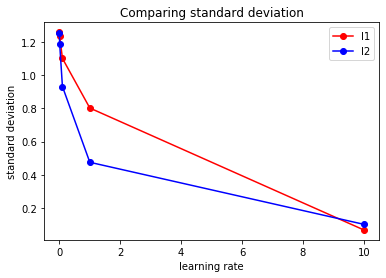

In [8]:
#0.001 -> 0.01 -> 0.1 -> 1 -> 10
learning_rates = [0.001, 0.01, 0.1, 1, 10]
l_l1 = []
l_l2= []

for i in learning_rates:
    weights_l_l1, costs_l1 = l1(X, weights.copy(), Y, l=i)
    weights_l_l2, costs_l2 = l2(X, weights.copy(), Y, l=i)
    l_l1.append(np.ravel(weights_l_l1))
    l_l2.append(np.ravel(weights_l_l2))

plt.figure()
plt.plot(learning_rates, [np.std(x) for x in l_l1], 'r', marker='o', label="l1")
plt.plot(learning_rates, [np.std(x) for x in l_l2], 'b',marker='o', label="l2")

plt.legend()
plt.title('Comparing standard deviation')
plt.xlabel('learning rate')
plt.ylabel('standard deviation')

plt.show()